# Otel Rezervasyon İptali Tahmini

Bu projenin amacı, rezervasyonla ilişkili çeşitli özellikleri ve değişkenleri analiz ederek müşteriler tarafından iptal edilecek rezervasyonları tahmin etmektir.

# Bağlam
Çevrimiçi otel rezervasyon kanalları, rezervasyon olanaklarını ve müşterilerin davranışlarını önemli ölçüde değiştirmiştir. Rezervasyonların önemli bir kısmı, iptaller veya rezervasyonun kullanılmaması (no-show) nedeniyle sonlandırılmaktadır. İptal nedenleri genellikle plan değişiklikleri, program çakışmaları vb. olarak karşımıza çıkar. İptal işlemi çoğu zaman ücretsiz veya düşük bir ücret karşılığında yapılabilir. Bu durum otel müşterileri için avantajlı olsa da oteller için istenmeyen ve gelir kaybına neden olabilecek bir faktördür.

Veri Sözlüğü
| Sütun Adı | Açıklama | 
| --- | --- | 
| Booking_ID | Her rezervasyonun benzersiz tanımlayıcısı | 
| no_of_adults | Yetişkin sayısı | 
| no_of_children | Çocuk sayısı | 
| no_of_weekend_nights | Müşterinin otelde kaldığı veya kalmayı planladığı hafta sonu gecelerinin sayısı (Cumartesi veya Pazar) | 
| no_of_week_nights | Müşterinin otelde kaldığı veya kalmayı planladığı hafta içi gecelerinin sayısı (Pazartesi-Cuma) | 
| meal_type | Müşterinin rezervasyon yaptığı yemek tipi | 
| required_car_parking_spaces | Müşterinin araba park alanına ihtiyacı var mı? (0 - Hayır, 1 - Evet) | 
| lead_time | Rezervasyon tarihi ile varış tarihi arasındaki gün sayısı | 
| arrival_year | Varış yılı | 
| arrival_month | Varış ayı | 
| arrival_date | Varış tarihi | 
| market_segment | Pazar segmenti tanımı | 
| repeated_guest | Müşteri tekrarlayan bir misafir mi? (0 - Hayır, 1 - Evet) | 
| no_previous_cancellations | Mevcut rezervasyondan önce müşteri tarafından iptal edilen önceki rezervasyonların sayısı | 
| previous_bookings_not_canceled | Mevcut rezervasyondan önce müşteri tarafından iptal edilmeyen önceki rezervasyonların sayısı | 
| avg_price_per_room | Rezervasyonun günlük ortalama oda fiyatı; oda fiyatları dinamiktir (euro cinsinden) | 
| no_of_special_requests | Müşteri tarafından yapılan özel isteklerin toplam sayısı (örn. yüksek kat, oda manzarası, vb.) | 
| booking_status | Rezervasyonun iptal edilip edilmediğini gösteren bayrak |

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [47]:
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [48]:
df.shape


(36275, 19)

In [49]:
df.drop(['Booking_ID'], axis=1, inplace=True)


In [50]:
df['date of arrival'] = df['arrival_year'].astype(str) + '/' + df['arrival_month'].astype(str) + '/' + df['arrival_date'].astype(str)

#type casting the date column
df['date of arrival'] = pd.to_datetime(df['date of arrival'],format='mixed', infer_datetime_format=True, errors='coerce',yearfirst=True)

#dropping the columns
df.drop(columns=['arrival_date', 'arrival_month', 'arrival_year'], inplace=True)

C:\Users\asli_\AppData\Local\Temp\ipykernel_9860\4203053384.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date of arrival'] = pd.to_datetime(df['date of arrival'],format='mixed', infer_datetime_format=True, errors='coerce',yearfirst=True)


In [51]:
df.isnull().sum()


no_of_adults                             0
no_of_children                           0
no_of_weekend_nights                     0
no_of_week_nights                        0
type_of_meal_plan                        0
required_car_parking_space               0
room_type_reserved                       0
lead_time                                0
market_segment_type                      0
repeated_guest                           0
no_of_previous_cancellations             0
no_of_previous_bookings_not_canceled     0
avg_price_per_room                       0
no_of_special_requests                   0
booking_status                           0
date of arrival                         37
dtype: int64

In [52]:
df.dropna(inplace=True)
df.reset_index()

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date of arrival
0,0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36233,36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03
36234,36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Online,0,0,0,90.95,2,Canceled,2018-10-17
36235,36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01
36236,36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled,2018-04-21


In [53]:
df.dtypes


no_of_adults                                     int64
no_of_children                                   int64
no_of_weekend_nights                             int64
no_of_week_nights                                int64
type_of_meal_plan                               object
required_car_parking_space                       int64
room_type_reserved                              object
lead_time                                        int64
market_segment_type                             object
repeated_guest                                   int64
no_of_previous_cancellations                     int64
no_of_previous_bookings_not_canceled             int64
avg_price_per_room                             float64
no_of_special_requests                           int64
booking_status                                  object
date of arrival                         datetime64[ns]
dtype: object

In [54]:
df.nunique()


no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3919
no_of_special_requests                     6
booking_status                             2
date of arrival                          549
dtype: int64

In [55]:
df.describe()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,date of arrival
count,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238
mean,1.845301,0.105221,0.810475,2.204206,0.030934,85.275070,0.025553,0.023346,0.152961,103.437259,0.619957,2018-05-24 16:37:29.130746880
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-07-01 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518572,0.402540,0.870992,1.410784,0.173142,85.953561,0.157801,0.368483,1.753366,35.084264,0.786403,NaN


In [56]:
df['avg_price_per_room'].replace(0,df['avg_price_per_room'].mean(), inplace=True)


C:\Users\asli_\AppData\Local\Temp\ipykernel_9860\108271725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_price_per_room'].replace(0,df['avg_price_per_room'].mean(), inplace=True)


In [57]:
df.drop(df[df['no_of_adults'] == 0].index, inplace = True)


In [58]:
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date of arrival
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11


# Keşifsel Veri Analizi

Keşifsel veri analizinde, veriyi daha iyi anlamak ve veride herhangi bir eğilim veya desen olup olmadığını görmek için görselleştirme yapacağım. İlk olarak, verinin dağılımına bakarak başlayacağım, ardından bağımsız değişkenler ile hedef değişken arasındaki ilişkiyi inceleyeceğim.

Text(0.5, 1.0, 'Number of Children')

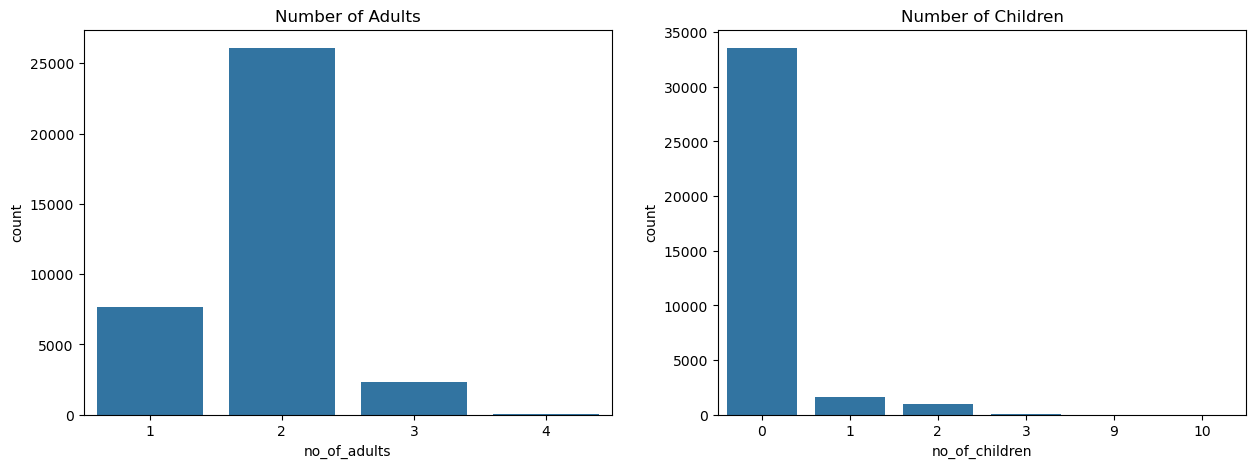

In [59]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot( x = 'no_of_adults', data = df, ax=ax[0]).set_title('Number of Adults')
sns.countplot( x = 'no_of_children', data = df, ax=ax[1]).set_title('Number of Children')

Bu grafikler, yetişkin ve çocuk sayısını içeren misafir bilgilerini göstermektedir. Rezervasyonların çoğunluğu, çocuk olmadan 2 yetişkin için yapılmıştır; bu durum, rezervasyonların çoğunun çiftler için yapıldığını gösterebilir. En yaygın ikinci rezervasyon tipi ise, çocuk olmadan 1 yetişkin içindir; bu da rezervasyonların çoğunun iş seyahati için yapıldığı anlamına gelebilir. Az sayıda rezervasyon ise 1 veya 2 çocuk ile yapılmış olup, bu rezervasyonlar aileler tarafından yapılmış olabilir.

Text(0.5, 1.0, 'Number of Week Nights')

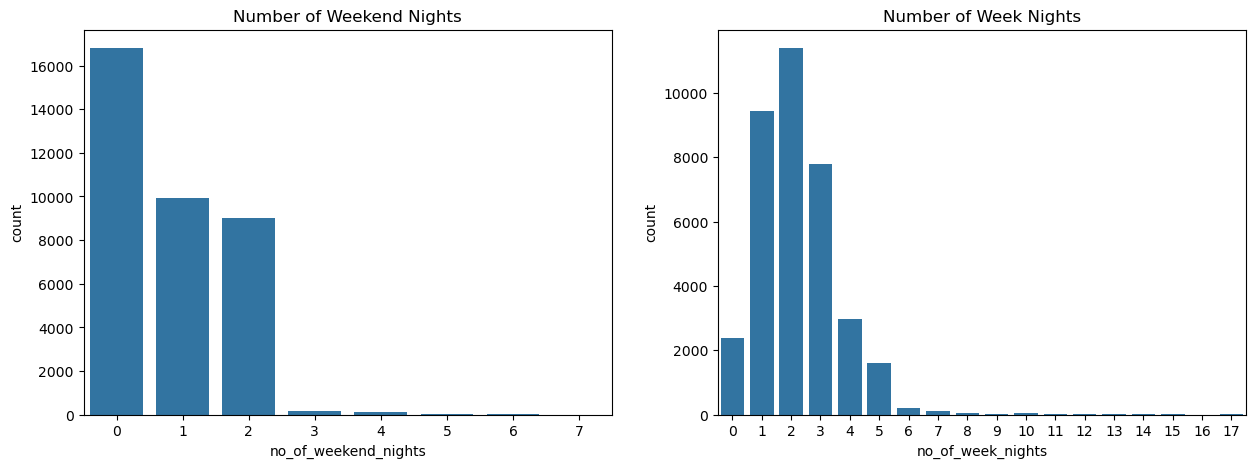

In [60]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'no_of_weekend_nights', data = df, ax=ax[0]).set_title('Number of Weekend Nights')
sns.countplot(x = 'no_of_week_nights', data = df, ax=ax[1]).set_title('Number of Week Nights')

Bu grafikler, çoğu misafirin otelde hafta içi geceleri kalmak için rezervasyon yaptığını göstermektedir. Otel rezervasyonlarının çoğunluğu 1 veya 2 gece içindir. Ancak, hafta sonları için de önemli sayıda rezervasyon yapılmaktadır. Buradan, hafta sonu rezervasyonlarının tatil amaçlı, hafta içi rezervasyonlarının ise iş seyahati veya diğer nedenlerle yapıldığını varsayabilirim.

Text(0.5, 1.0, 'Day of week of arrival')

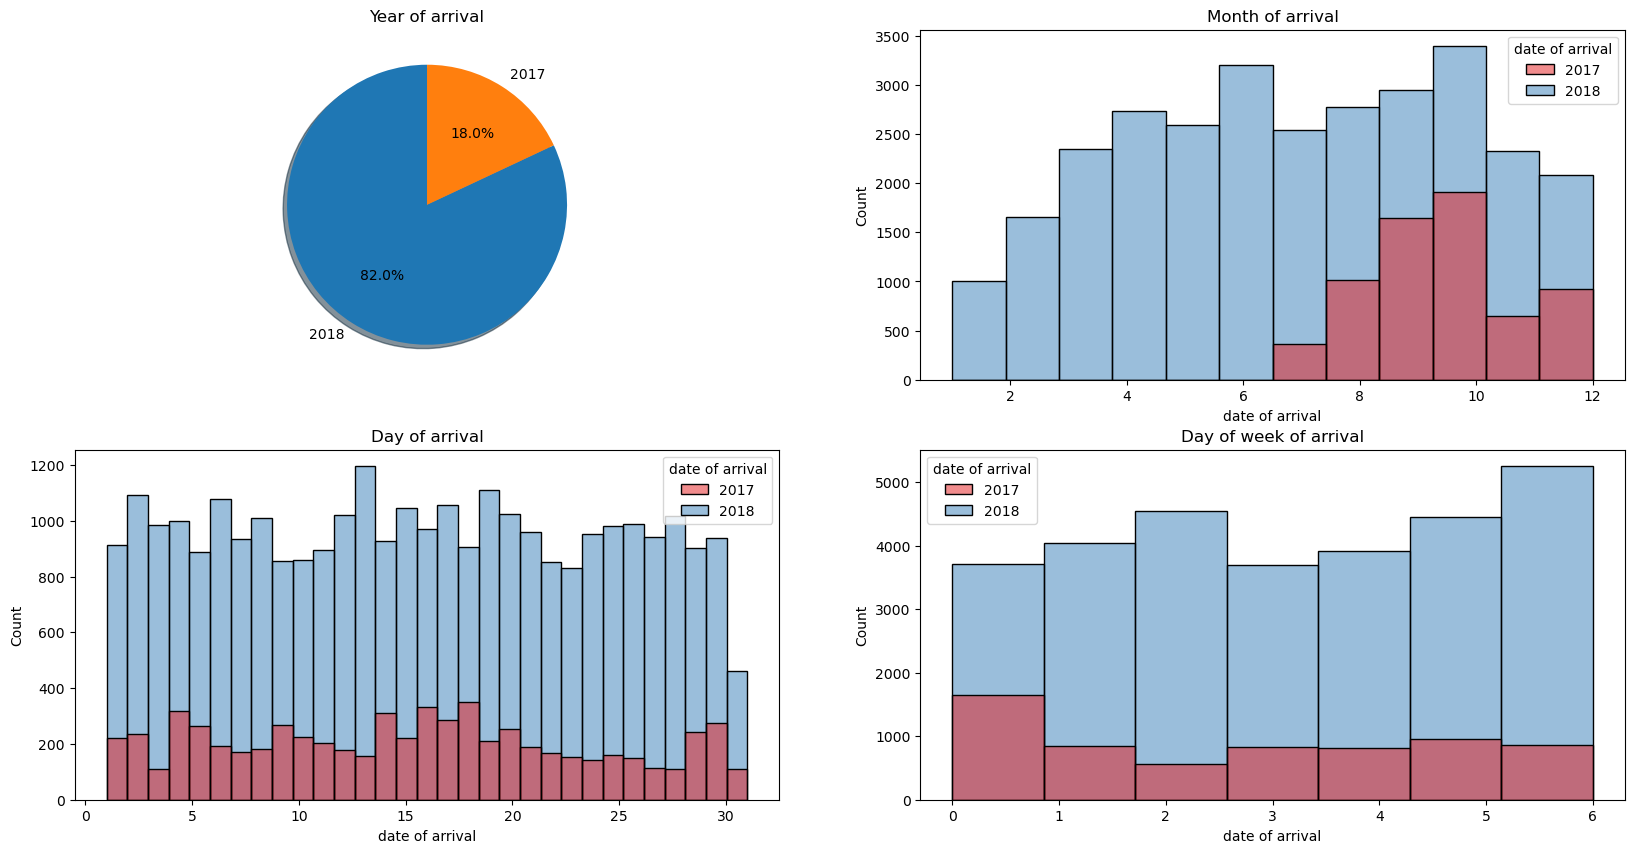

In [61]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

#year of arrival
ax[0,0].pie(df['date of arrival'].dt.year.value_counts(), labels = [2018,2017], autopct='%1.1f%%', shadow=True, startangle=90)
ax[0,0].set_title('Year of arrival')

#month of arrival   
sns.histplot(x = df['date of arrival'].dt.month, ax=ax[0,1], bins=12, hue = df['date of arrival'].dt.year, palette = 'Set1').set_title('Month of arrival')

#day of arrival
sns.histplot(x = df['date of arrival'].dt.day, ax=ax[1,0], bins=31, hue = df['date of arrival'].dt.year, palette = 'Set1').set_title('Day of arrival')

#day of week of arrival
sns.histplot(x = df['date of arrival'].dt.dayofweek, ax=ax[1,1], bins=7, hue = df['date of arrival'].dt.year, palette = 'Set1').set_title('Day of week of arrival')


Bu grafikler, belirli tarih, gün, ay ve yıl için yapılan rezervasyon sayılarını göstermektedir. Veri setinde rezervasyonların çoğunluğu 2018 yılında yapılmıştır, yani %82’si 2018 yılına aittir. Her iki yılda da Ekim ayı, diğer aylara kıyasla en fazla rezervasyonun yapıldığı aydır. 2017 yılında Ekim ayında yaklaşık 2000 rezervasyon yapılırken, 2018 yılında bu sayı yaklaşık 3500 olmuştur. Ayrıca, Ekim ayından sonra en fazla rezervasyon Haziran ayında yapılmıştır. Aylık günlere bakıldığında, 2017 yılında 4, 14, 16 ve 18. günlerde en çok rezervasyon yapılmıştır. 2018 yılında ise 2, 7, 14 ve 19. günlerde en çok rezervasyon yapılmıştır. Haftanın günlerine göre, 2017 yılında Pazar günleri en fazla rezervasyon yapılan gün iken, 2018 yılında Cumartesi günleri en fazla rezervasyon yapılan gündür.

Yukarıdaki görselleştirmelere dayanarak, daha fazla rezervasyonun özellikle Haziran ve Ekim aylarında, ikinci ve üçüncü haftalarda ve hafta sonlarında yapıldığını söyleyebilirim.

Text(0.5, 1.0, 'Number of special requests')

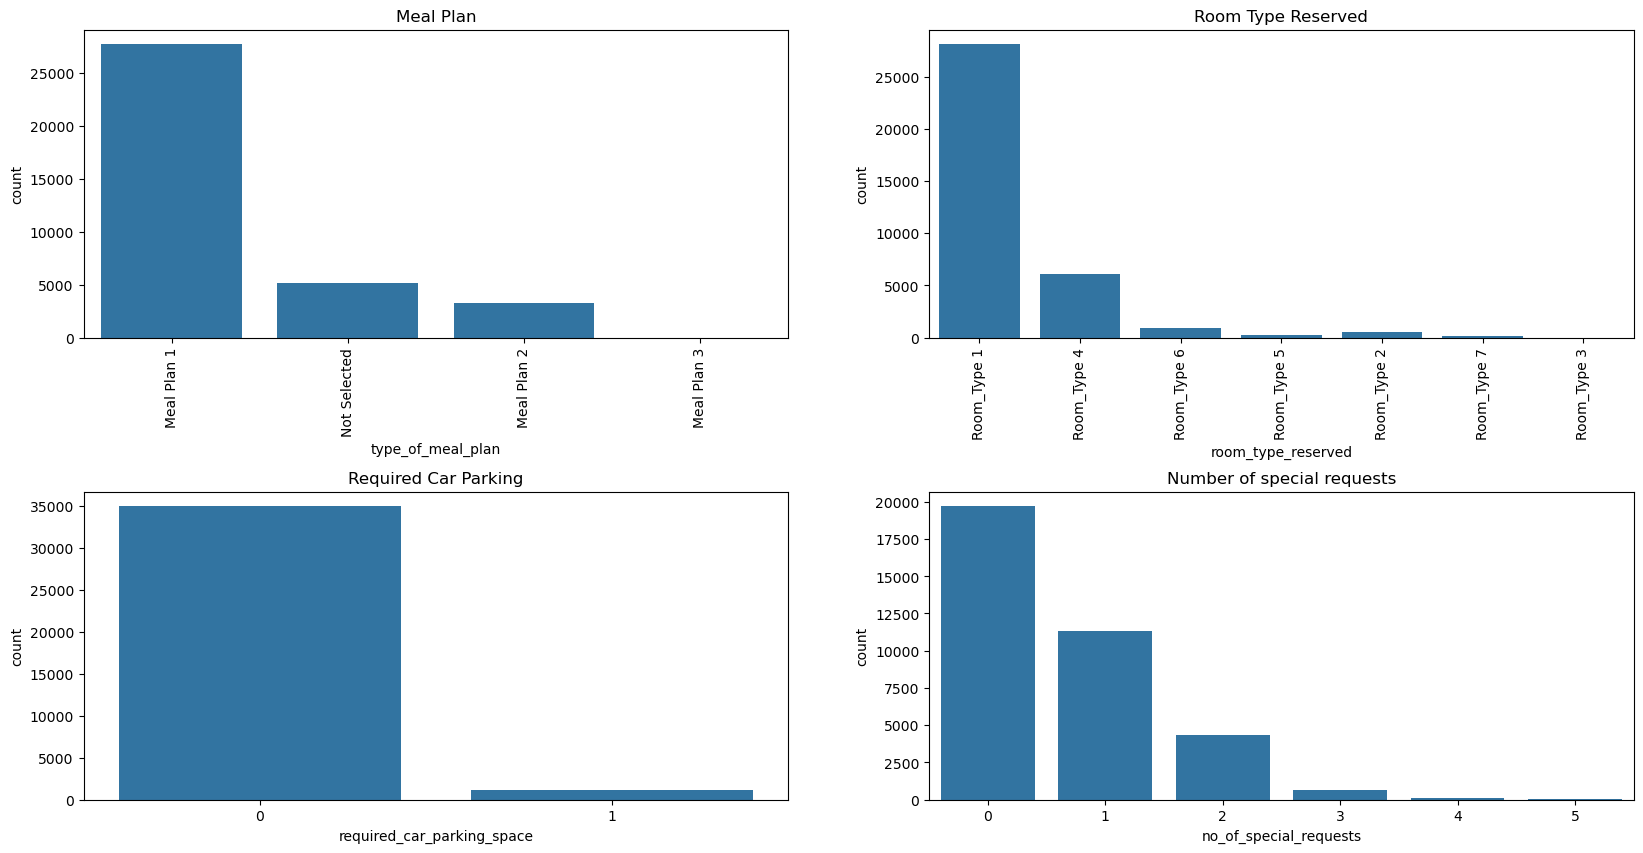

In [62]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

sns.countplot(x = 'type_of_meal_plan', data = df, ax=ax[0,0]).set_title('Meal Plan')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'room_type_reserved', data = df, ax=ax[0,1]).set_title('Room Type Reserved')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'required_car_parking_space', data = df, ax=ax[1,0]).set_title('Required Car Parking')

sns.countplot(x = 'no_of_special_requests', data = df, ax=ax[1,1]).set_title('Number of special requests')

Yukarıdaki grafikler, misafirlerin rezervasyon sırasında otelde tercih ettikleri hizmet türlerini göstermektedir. Çoğu misafir, rezervasyon sırasında Yemek Planı 1'i ve Oda Tipi 1’i tercih etmiş olup özel bir istek belirtmemiş ve park alanına ihtiyaç duymamıştır. Ayrıca, önemli sayıda rezervasyon, yemek planı belirtilmeden yapılmıştır; bu da misafirlerin yemeklerini otel dışında yemeyi tercih etmiş olabileceğini göstermektedir. Park alanı ihtiyacı grafiği aynı zamanda misafirlerin ulaşım şekli hakkında da bilgi vermektedir. Çoğu misafir otele toplu taşıma veya taksi ile ulaşmıştır.

Text(0.5, 1.0, 'Lead Time in days')

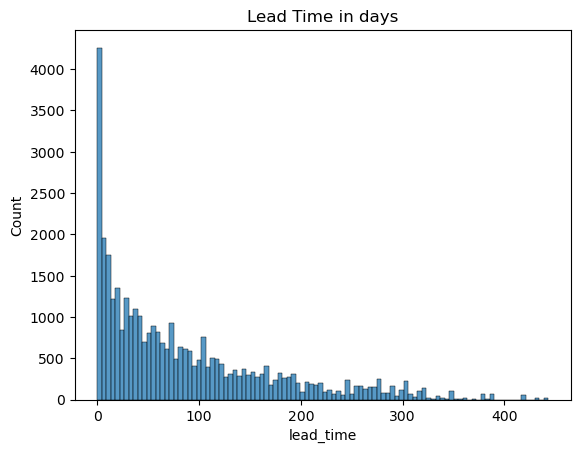

In [63]:
sns.histplot(x = 'lead_time', data = df, bins=100).set_title('Lead Time in days')


Bu grafik, önemli sayıda rezervasyonun varış tarihinden bir gün önce veya aynı gün yapıldığını göstermektedir. Bunun yanı sıra, rezervasyonların çoğunun varış tarihinden 1-2 hafta önce yapıldığı gözlemlenmiştir. Ancak, varış tarihinden 2-3 ay önce yapılan rezervasyonlar da bulunmaktadır. Bu histogramdan, varış tarihine çok az süre kalan (lead time düşük olan) misafirlerin, rezervasyonu iptal etme olasılığının, daha uzun süre önce rezervasyon yapmış misafirlere kıyasla daha düşük olabileceği şeklinde bir hipotez geliştirdim.

Text(0.5, 1.0, 'Market Segment Type')

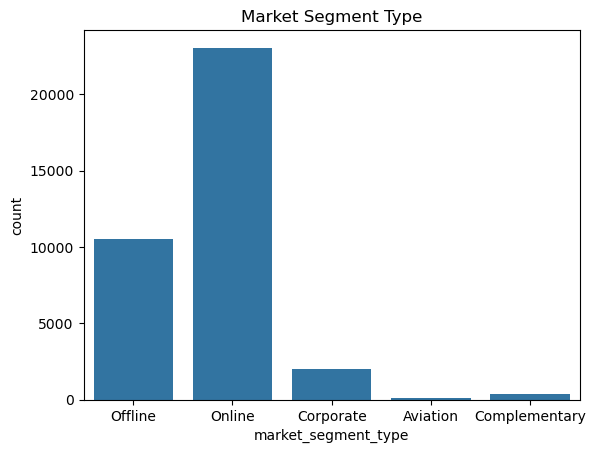

In [64]:
sns.countplot(x = 'market_segment_type', data = df).set_title('Market Segment Type')


Bu grafik, otelde yapılan rezervasyonların gerçekleştiği ana kanalları göstermektedir. Rezervasyonların çoğunluğu çevrimiçi platformlar aracılığıyla yapılmıştır; bu da otel şirketinin seyahat rezervasyon platformlarında daha fazla varlık gösterdiğini işaret etmektedir. En yaygın ikinci rezervasyon yöntemi, otele varışta veya bir seyahat acentesi aracılığıyla yapılmış olabilecek çevrimdışı rezervasyonlardır. Üçüncü en yaygın rezervasyon yöntemi ise kurumsal olup, bir şirket aracılığıyla yapılmış olabilir. Çok az sayıda rezervasyon ise havacılık şirketleri aracılığıyla yapılmıştır; bu durum otelin yakınında bir havaalanı olma olasılığını vurgulamaktadır.

Text(0.5, 1.0, 'Number of Previous Bookings Not Cancelled')

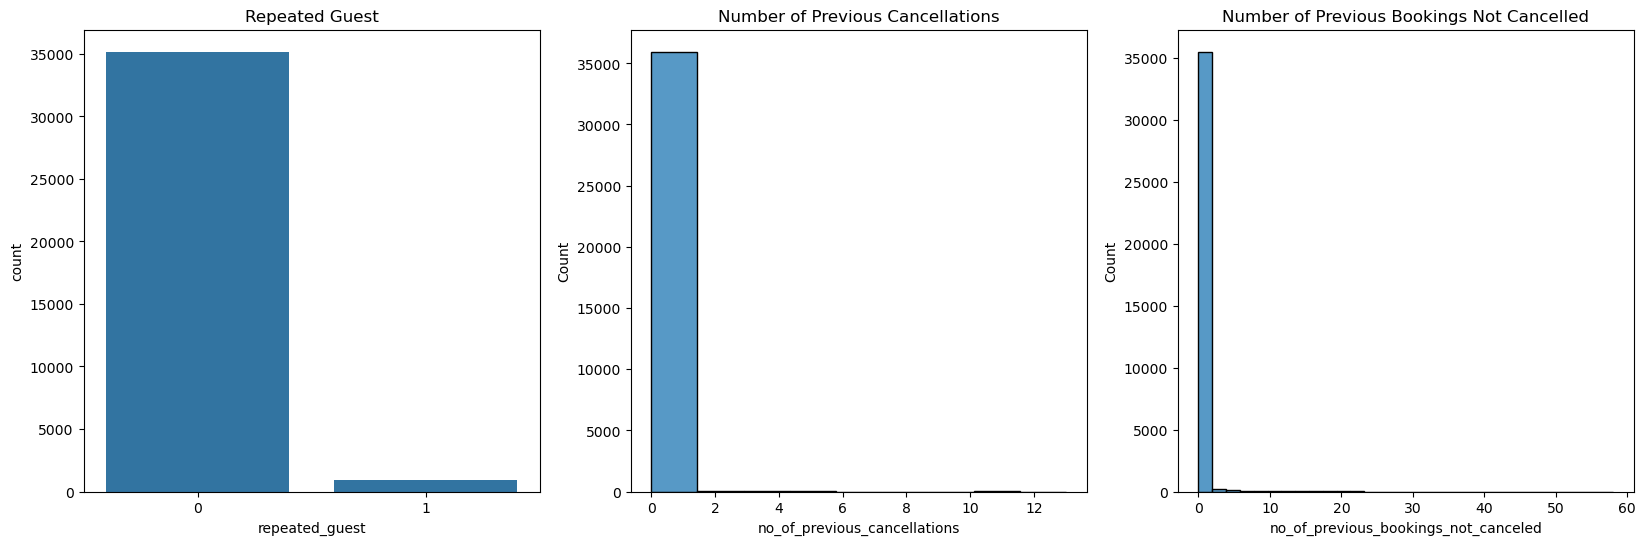

In [65]:
fig, ax = plt.subplots(1,3,figsize=(20,6))

sns.countplot(x = 'repeated_guest', data = df, ax=ax[0]).set_title('Repeated Guest')

sns.histplot(x = 'no_of_previous_cancellations', data = df, ax=ax[1], bins = 9).set_title('Number of Previous Cancellations')

sns.histplot(x = 'no_of_previous_bookings_not_canceled', data = df, ax=ax[2], bins = 30).set_title('Number of Previous Bookings Not Cancelled')


Otelin rezervasyonlarının çoğunluğu yeni misafirler tarafından yapılmıştır; çok az sayıda tekrar eden misafir bulunmaktadır. Bu durum, otelin müşteri sadakati konusunda bir sorun yaşadığını göstermektedir. Otel, misafirlerin tekrar ziyaret etmek isteyeceği daha iyi hizmetler sunmaya odaklanmalıdır. Misafirlerin çoğunluğu yeni olduğu için, veri setinin büyük kısmında önceki rezervasyon iptali sayısı 0 olarak görülmektedir. Ancak, daha yakından incelendiğinde, önceki rezervasyonlarını iptal etmiş bazı misafirlerin de bulunduğu gözlemlenebilir.


Text(0.5, 1.0, 'Average Room Price')

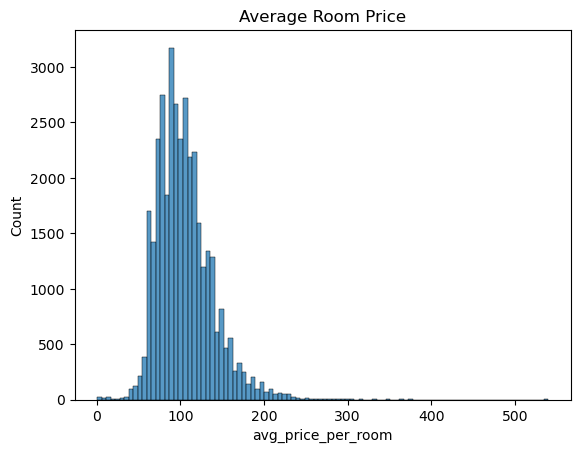

In [66]:
sns.histplot(x = 'avg_price_per_room', data = df, bins = 100).set_title('Average Room Price')


Bu grafik, oda fiyatlarının dağılımını göstermektedir. Rezervasyonların çoğunda oda fiyatı 75 ile 150 arasında değişmektedir. 200’den yüksek oda fiyatına sahip rezervasyonlar ise çok azdır.

Şu ana kadar tüm değişkenlerde verinin dağılımını görselleştirdim ve bunlar üzerinden bazı hipotezler geliştirdim. Şimdi, hipotezleri test etmek için bağımsız değişkenler ile hedef değişken arasındaki ilişkiye bakacağım.

Text(0.5, 1.0, 'Number of Children')

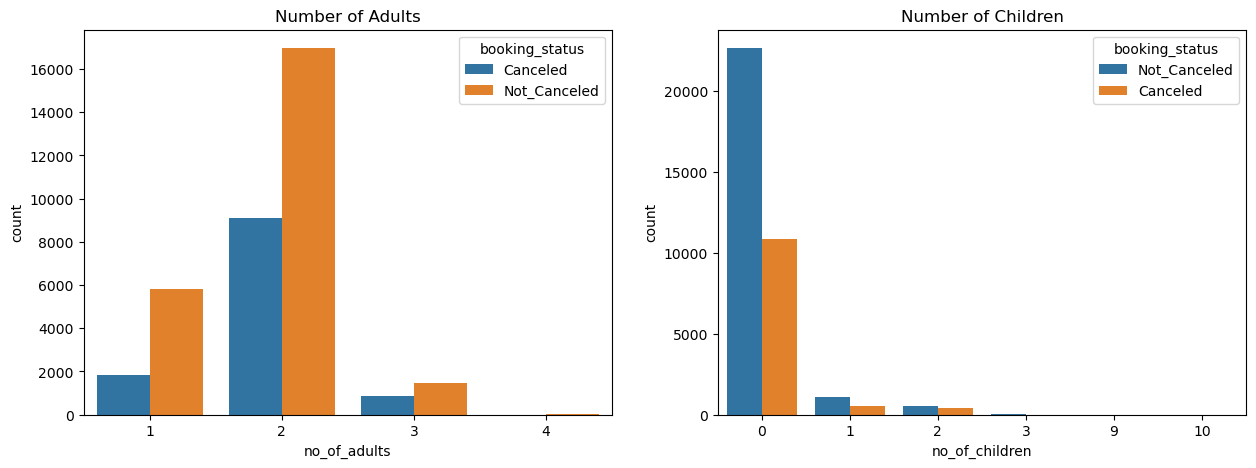

In [67]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot( x = 'no_of_adults', data = df, ax=ax[0], hue= 'booking_status').set_title('Number of Adults')
sns.countplot( x = 'no_of_children', data = df, ax=ax[1], hue = 'booking_status').set_title('Number of Children')


Çoğu rezervasyon iptali, iki yetişkin için yapılmış rezervasyonlarda yapılmıştır, muhtemelen çocuk olmadan. İkinci en yaygın iptal, bir yetişkin için yapılmış rezervasyonlarda gerçekleşmiştir. Ancak, rezervasyon çocuk içerdiğinde ve 2'den fazla yetişkin olduğunda, iptal sayısı azalır.


Text(0.5, 1.0, 'Number of Week Nights')

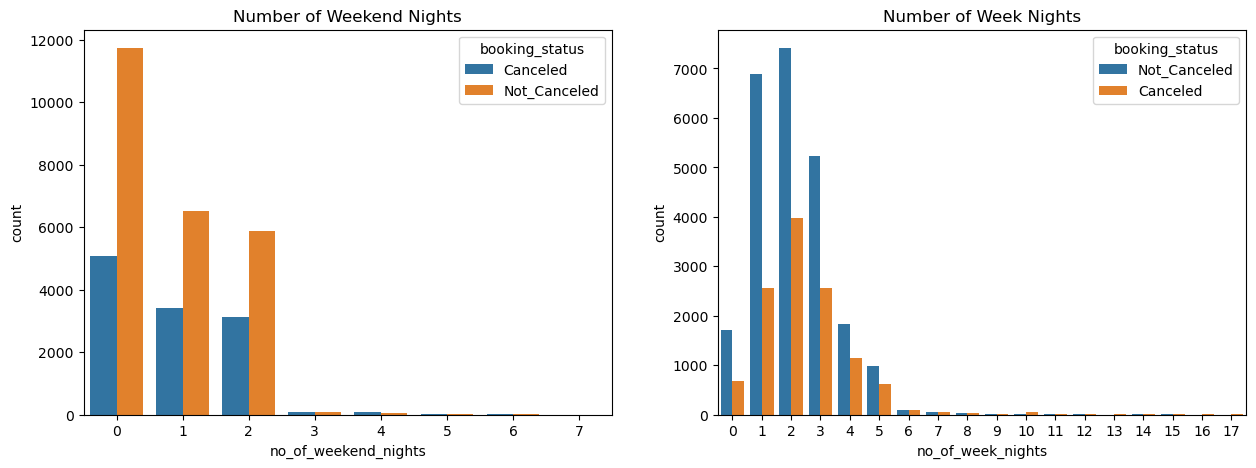

In [68]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'no_of_weekend_nights', data = df, ax=ax[0], hue = 'booking_status').set_title('Number of Weekend Nights')
sns.countplot(x = 'no_of_week_nights', data = df, ax=ax[1], hue = 'booking_status').set_title('Number of Week Nights')


Bu grafikler, rezervasyon iptalleri hakkında ilginç bilgiler ortaya koymaktadır. Bir veya iki hafta sonu gecesi geçirmek için yapılan rezervasyonların iptal sayısı daha düşüktür. Buna karşılık, otelde 2 hafta içi günü geçirmek için yapılan rezervasyonlar, en yüksek iptal sayısına sahipken, bunu 1 ve 3 hafta içi günü takip etmektedir. Bu durum, misafirlerin rezervasyonlarını iptal etme olasılığının, hafta içi ve 3 günden daha az süreyle kalmayı planlayanlar için daha yüksek olabileceğini gösterebilir. Ancak, bu sayı, hafta sonu rezervasyonlarında daha düşük olmaktadır.

Text(0.5, 1.0, 'Cancellation by day of week in 2018')

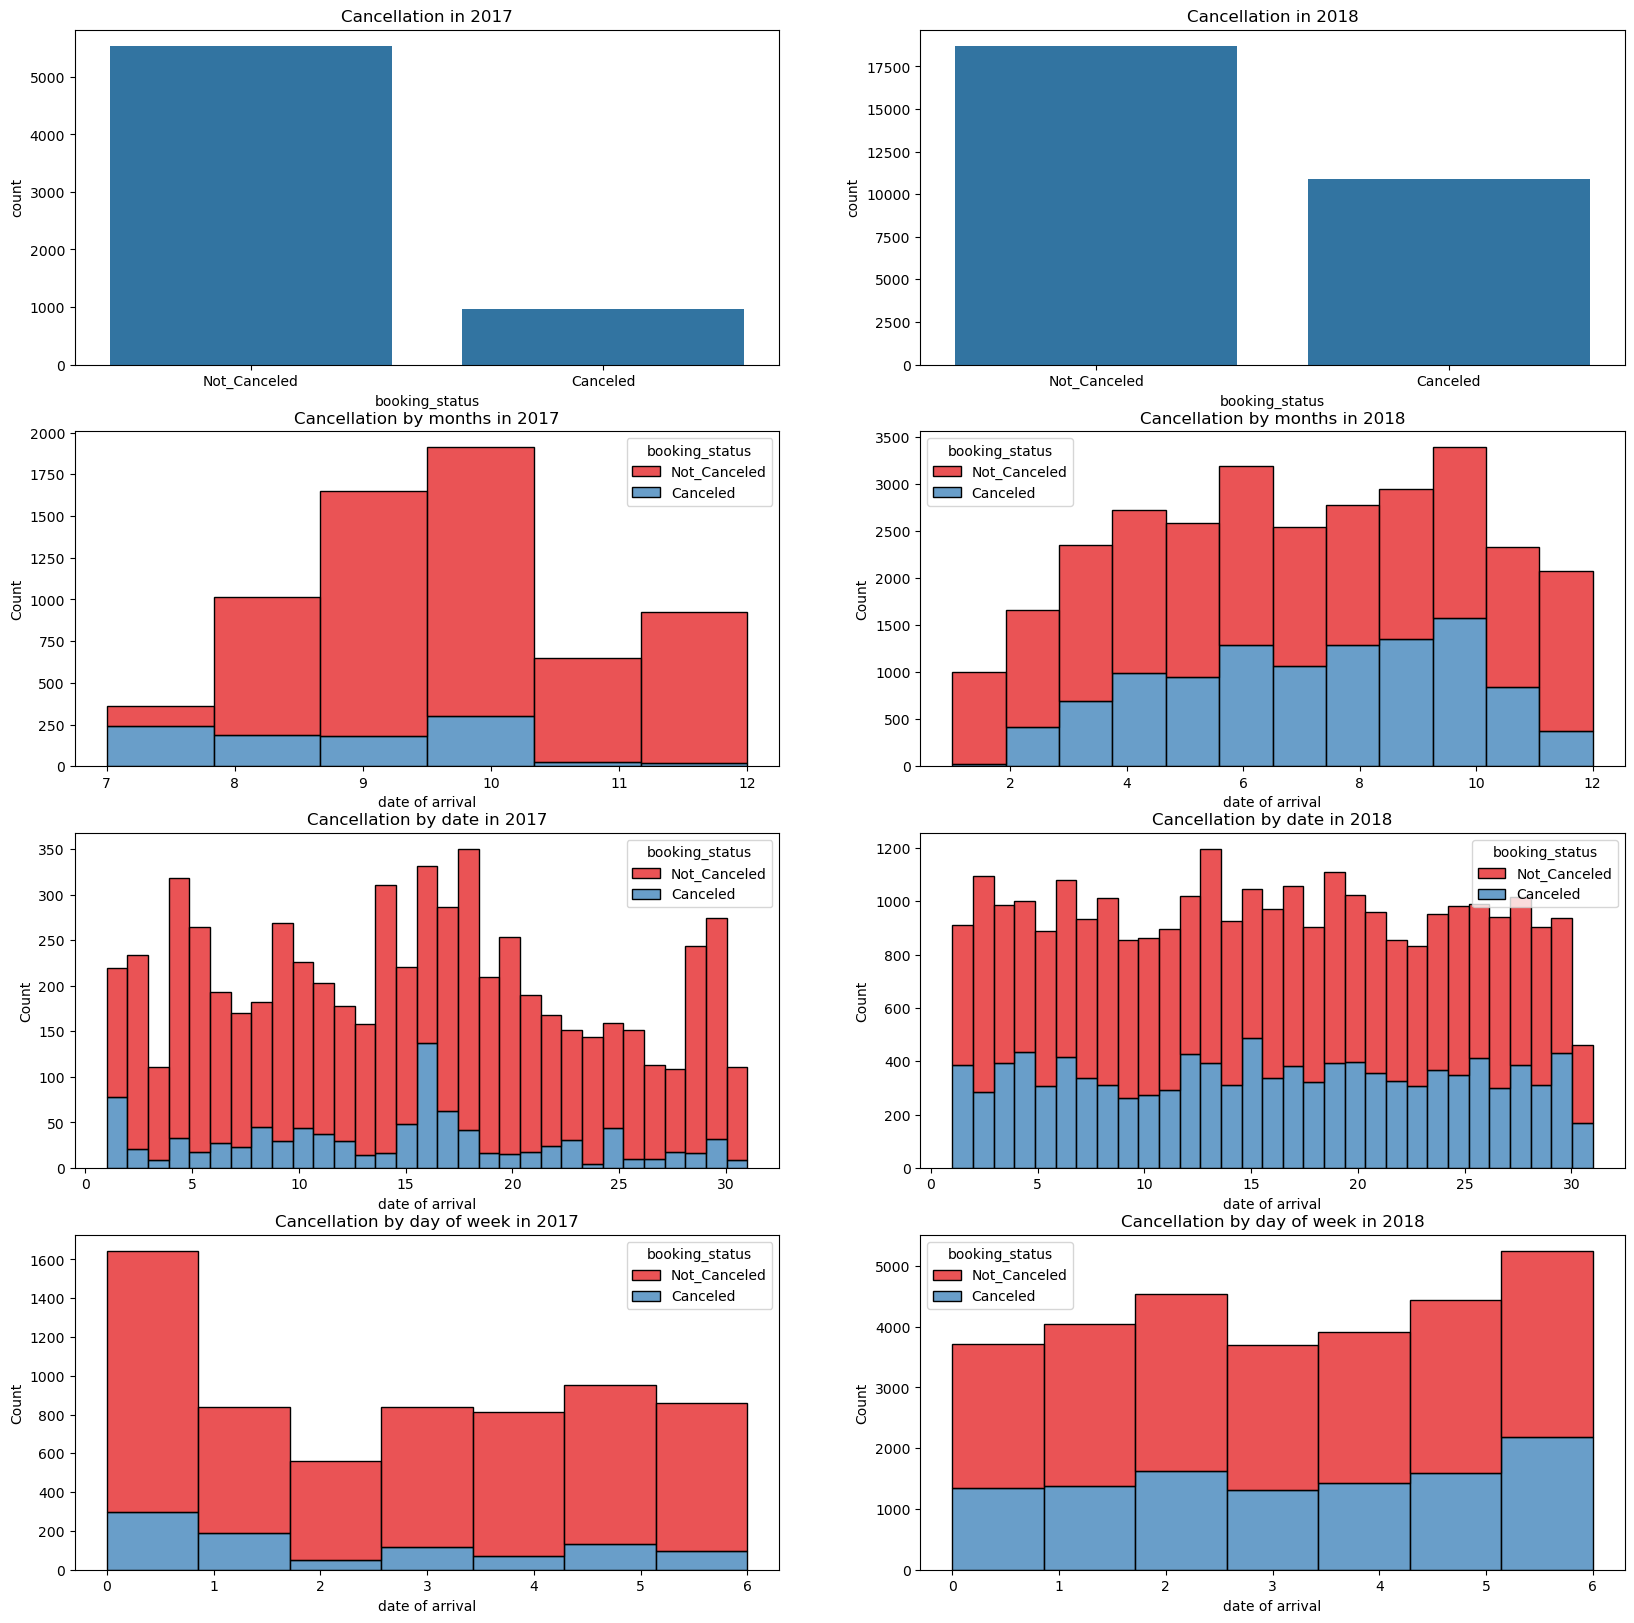

In [69]:
fig,ax = plt.subplots(4,2,figsize=(20,20))
df_2017 = df[df['date of arrival'].dt.year == 2017]
df_2018 = df[df['date of arrival'].dt.year == 2018]

#year wise
sns.countplot(x = df_2017['booking_status'], data = df_2017, ax=ax[0,0]).set_title('Cancellation in 2017')
sns.countplot(x = df_2018['booking_status'], data = df_2018, ax=ax[0,1]).set_title('Cancellation in 2018')

#month wise
sns.histplot(x = df_2017['date of arrival'].dt.month, data = df_2017, ax=ax[1,0], bins=6, hue = df_2017['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by months in 2017')
sns.histplot(x = df_2018['date of arrival'].dt.month, data = df_2018, ax=ax[1,1], bins=12, hue = df_2018['booking_status'], palette = 'Set1', multiple ='stack').set_title('Cancellation by months in 2018')

#date wise
sns.histplot(x = df_2017['date of arrival'].dt.day, data = df_2017, ax=ax[2,0], bins=31, hue = df_2017['booking_status'], palette = 'Set1', multiple='stack').set_title('Cancellation by date in 2017')
sns.histplot(x = df_2018['date of arrival'].dt.day, data = df_2018, ax=ax[2,1], bins=31, hue = df_2018['booking_status'], palette = 'Set1', multiple ='stack').set_title('Cancellation by date in 2018')

#day of week wise
sns.histplot(x = df_2017['date of arrival'].dt.dayofweek, data = df_2017, ax=ax[3,0], bins=7, hue = df_2017['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by day of week in 2017')
sns.histplot(x = df_2018['date of arrival'].dt.dayofweek, data = df_2018, ax=ax[3,1], bins=7, hue = df_2018['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by day of week in 2018')


Yukarıdaki grafikler, rezervasyon iptallerini yapılan rezervasyon tarihine göre görselleştirmektedir. Veri setinin çoğunlukla 2018 yılına ait olmasına rağmen, 2018'de iptal edilen rezervasyon sayısı 2017'ye göre çok daha yüksektir. 2017 yılında yaklaşık 5500 rezervasyon iptal edilmeden kalmış ve yaklaşık 1000 rezervasyon iptal edilmiştir. Ancak, 2018 yılında 17500 rezervasyon iptal edilmeden kalmış ve 10000'den fazla rezervasyon iptal edilmiştir. Bu durum, 2018'de rezervasyon iptali oranının çok daha yüksek olduğunu göstermektedir.

Aylara göre rezervasyon iptallerine bakıldığında, 2017'de Temmuz ve Ekim ayında yapılan rezervasyonlar en yüksekti. Ayrıca, Temmuz ayında yapılan rezervasyon sayısı en düşük olmasına rağmen, en yüksek iptal oranına sahip olması, verilerde belirtilmeyen bazı özel bir duruma işaret ediyor olabilir. 2018'de ise Haziran ve Ekim aylarında en yüksek rezervasyon sayıları kaydedilmiştir.

Şimdi, ayın gününe göre rezervasyon iptallerine bakacağız. 2017'de en çok rezervasyon iptali 16. günde ve ilginç bir şekilde ayın 1. gününde olmuştur. 2018'de ise iptallerin çoğu ayın ikinci ve birinci haftasında olmuştur.

Gün bazında iptallere gelince, 2017'de Pazar günleri en fazla iptal gerçekleşen gündü. 2018'de ise Cumartesi günleri en fazla iptal edilen gündü.

Text(0.5, 1.0, 'Number of special requests')

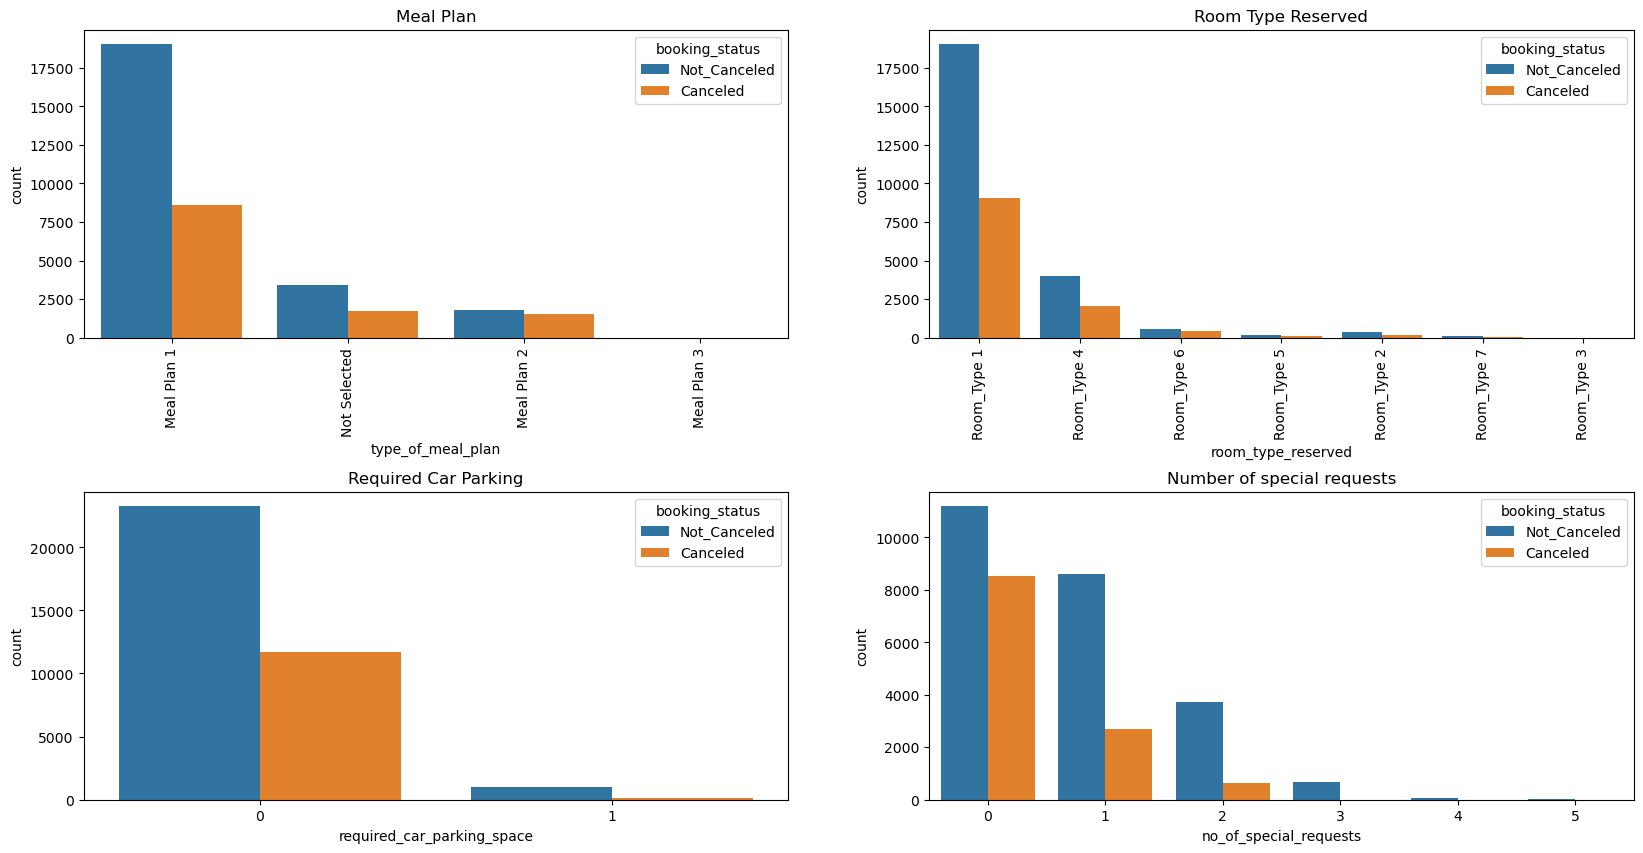

In [70]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

sns.countplot(x = 'type_of_meal_plan', data = df, ax=ax[0,0], hue = 'booking_status').set_title('Meal Plan')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'room_type_reserved', data = df, ax=ax[0,1], hue = 'booking_status').set_title('Room Type Reserved')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.countplot(x = 'required_car_parking_space', data = df, ax=ax[1,0], hue = 'booking_status').set_title('Required Car Parking')

sns.countplot(x = 'no_of_special_requests', data = df, ax=ax[1,1], hue = 'booking_status').set_title('Number of special requests')


Yukarıdaki grafiklerde, iptal edilen ve edilmeden kalan rezervasyonların oranının tüm hizmetler için neredeyse aynı olduğu görülmektedir. Bu nedenle, otelin sağladığı hizmetlerin, rezervasyon iptali üzerinde herhangi bir etkisi olmadığı sonucuna varabilirim.

Text(0.5, 1.0, 'Lead Time in days')

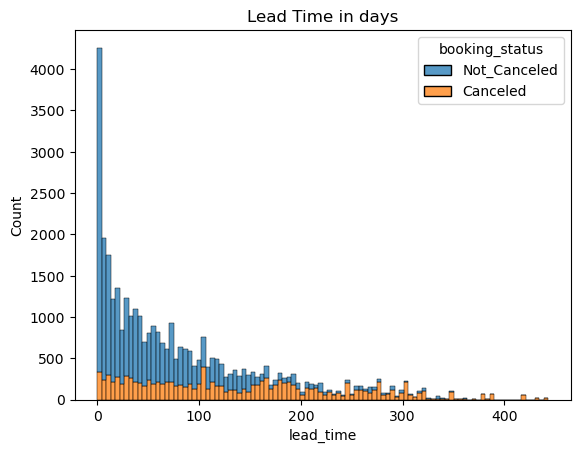

In [71]:
sns.histplot(x = 'lead_time', data = df, bins=100, hue = 'booking_status', multiple = 'stack').set_title('Lead Time in days')


Hipotezim doğruydu. Lead time (rezervasyon ile varış arasındaki süre) arttıkça, iptal edilen rezervasyon sayısının da arttığı gözlemleniyor. Lead time arttıkça, iptal edilen ve edilmeden kalan rezervasyonlar arasındaki fark azalıyor. Bu durum, lead time'ı çok kısa olan misafirlerin, lead time'ı daha uzun olan misafirlere kıyasla rezervasyonlarını iptal etme olasılıklarının daha düşük olabileceğini gösteriyor.

Text(0.5, 1.0, 'Market Segment Type')

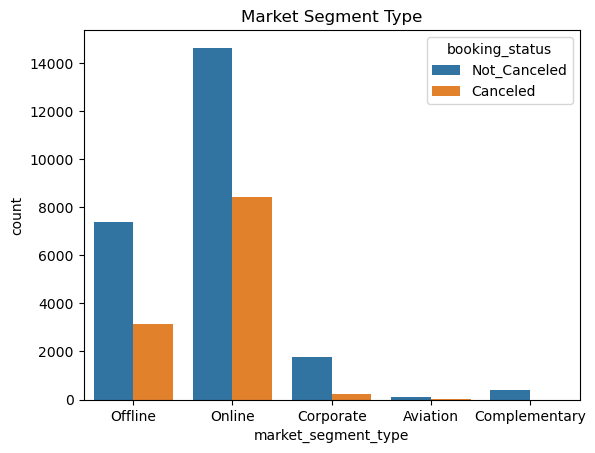

In [72]:
sns.countplot(x = 'market_segment_type', data = df, hue = 'booking_status').set_title('Market Segment Type')


Bu grafik, rezervasyonların ve iptallerin pazar segmentlerini göstermektedir. Burada, rezervasyonların çoğunluğunun çevrimiçi platformlar aracılığıyla yapıldığı ve bu nedenle en yüksek iptal sayısına sahip olduğu görülmektedir. İkinci en yaygın pazar segmenti ise çevrimdışı (offline) rezervasyonlardır ve bu segment, ikinci en yüksek iptal sayısına sahiptir.

Text(0.5, 1.0, 'Repeated Guest')

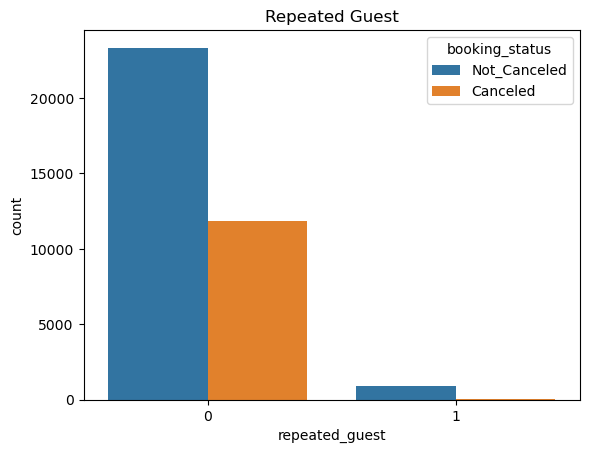

In [73]:
sns.countplot(x = 'repeated_guest', data = df, hue = 'booking_status').set_title('Repeated Guest')


Önceki misafirler, yeni misafirlere kıyasla rezervasyonlarını iptal etme olasılığı çok daha düşüktür.

Text(0.5, 1.0, 'Average Room Price')

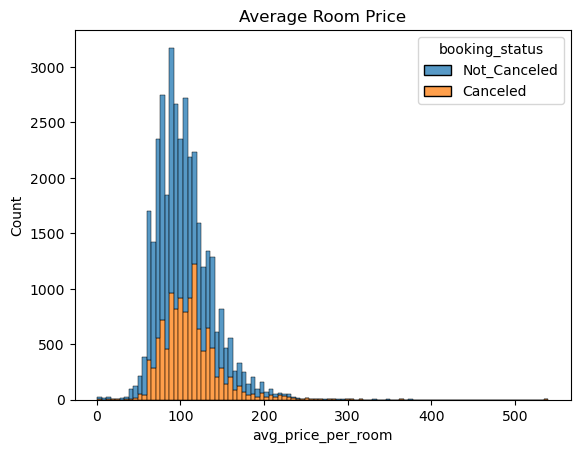

In [74]:
sns.histplot(x = 'avg_price_per_room', data = df, bins = 100, hue = 'booking_status', multiple = 'stack').set_title('Average Room Price')


Çoğu oda fiyatı 75-150 arasında olup, rezervasyon iptalleri de genellikle bu fiyat aralığında gerçekleşmektedir. Bu nedenle, oda fiyatı ile rezervasyon iptali arasında bir ilişki bulunmamaktadır.

In [75]:
#columns for outlier removal
cols = ['lead_time', 'avg_price_per_room']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [76]:
from sklearn.preprocessing import LabelEncoder
#label encoding object
le = LabelEncoder()

#columns to be encoded
cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

#label encoding
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

type_of_meal_plan [0 3 1 2]
room_type_reserved [0 3 5 4 1 6 2]
market_segment_type [3 4 2 0 1]
booking_status [1 0]


In [77]:
from sklearn.preprocessing import StandardScaler
#standardizing the data
scaler = StandardScaler()
df[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(df[['lead_time', 'avg_price_per_room']])

<Axes: >

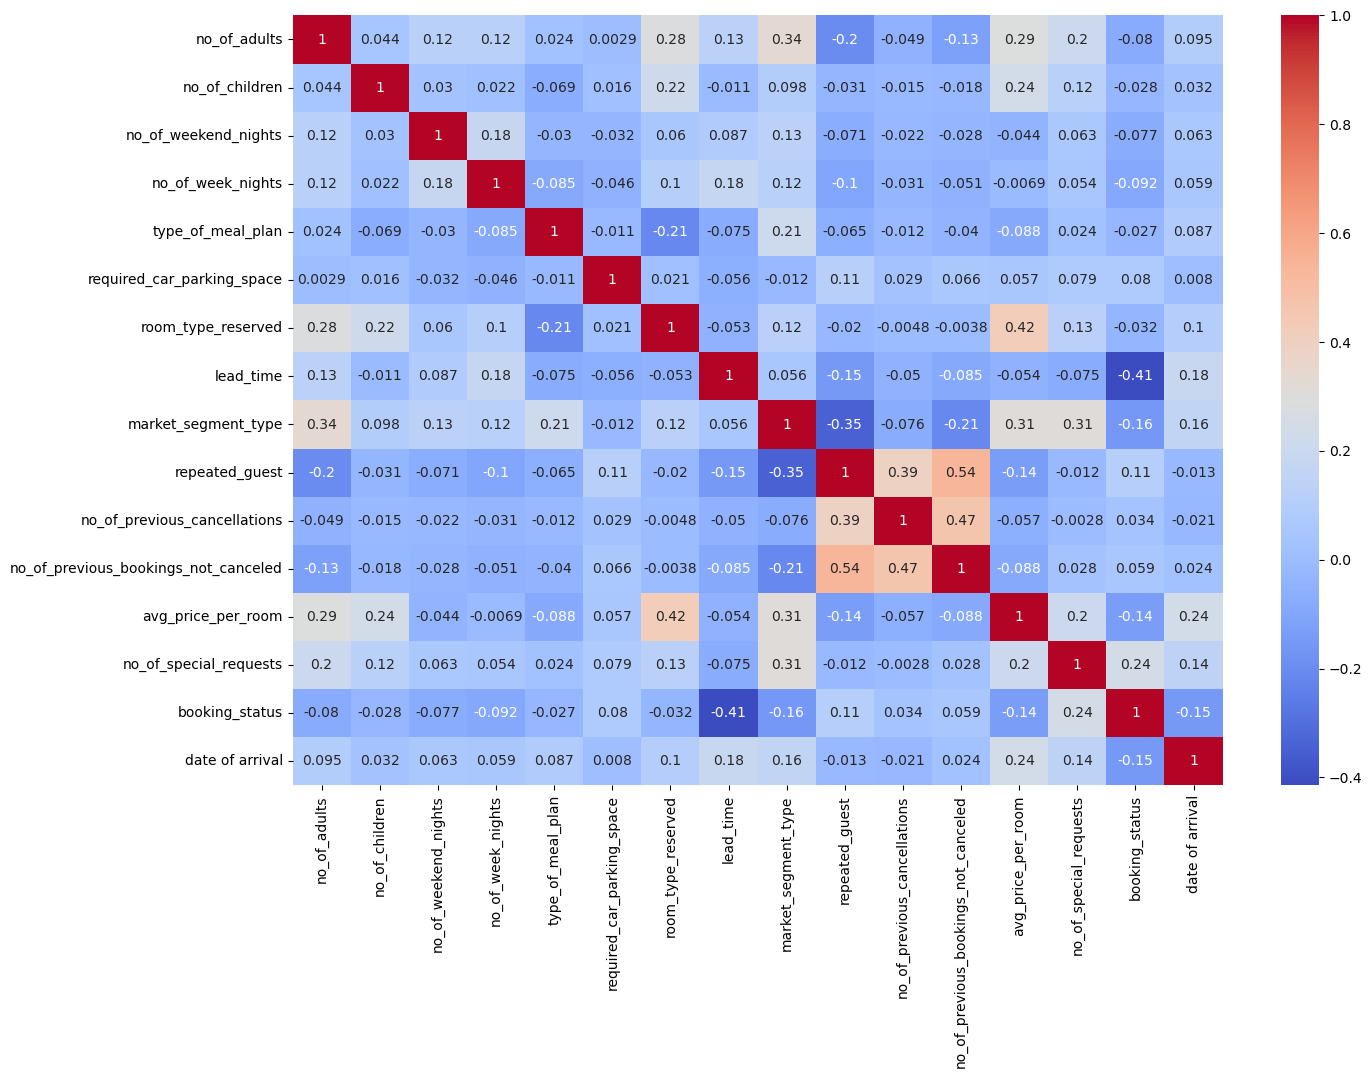

In [78]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [79]:
df.drop(columns=['date of arrival'], inplace=True)


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('booking_status', axis=1), df['booking_status'], test_size=0.2, random_state=42)


In [81]:
from sklearn.tree import DecisionTreeClassifier

#decision tree classifier Object
dtree = DecisionTreeClassifier()

In [82]:
from sklearn.model_selection import GridSearchCV

#grid search parameters
grid_param = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state' : [0,42]
}

#grid search object
grid_search = GridSearchCV(estimator=dtree, param_grid=grid_param, cv=5, n_jobs=-1, scoring='accuracy')

#fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

#best parameters
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [83]:
#decision tree classifier object with best parameters
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0)

#Training the model
dtree.fit(X_train, y_train)

#Training accuracy
print(dtree.score(X_train, y_train))

#Predicting the test set results
d_pred = dtree.predict(X_test)

0.85635687732342


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#random forest classifier object
rfc = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

#grid search parameters
grid_param = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state' : [0,42]
}

#grid search object
grid_search = GridSearchCV(estimator=rfc, param_grid=grid_param, cv=5, n_jobs=-1)

#fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

#best parameters
print(grid_search.best_params_)

In [ ]:
#random forest classifier object with best parameters
rfc = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=2, random_state=0)

#Training the model
rfc.fit(X_train, y_train)

#Training accuracy
print(rfc.score(X_train, y_train))

#Predicting the test set results
r_pred = rfc.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

#logistic regression object
logreg = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV

#grid search parameters
grid_param = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'random_state' : [0,42]
}

#grid search object
grid_search = GridSearchCV(estimator=logreg, param_grid=grid_param, cv=5, n_jobs=-1)

#fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

#best parameters
print(grid_search.best_params_)

In [ ]:
#logistic regression object with best parameters
logreg = LogisticRegression(C=1, penalty='l2', random_state=0, solver='liblinear')

#Training the model
logreg.fit(X_train, y_train)

#Training accuracy
print(logreg.score(X_train, y_train))

#Predicting the test set results
l_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,3,figsize=(20,5))

#decision tree
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='coolwarm', ax=ax[0]).set_title('Decision Tree')
#random forest
sns.heatmap(confusion_matrix(y_test, r_pred), annot=True, cmap='coolwarm', ax=ax[1]).set_title('Random Forest')
#logistic regression
sns.heatmap(confusion_matrix(y_test, l_pred), annot=True, cmap='coolwarm', ax=ax[2]).set_title('Logistic Regression')


In [ ]:
from sklearn.metrics import classification_report

#decision tree
print('Decision Tree')
print(classification_report(y_test, d_pred))
#random forest
print('Random Forest')
print(classification_report(y_test, r_pred))
#logistic regression
print('Logistic Regression')
print(classification_report(y_test, l_pred))

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

#decision tree
print('Decision Tree')
print('Accuracy Score: ', accuracy_score(y_test, d_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, d_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, d_pred))

print('\n')

#random forest
print('Random Forest')
print('Accuracy Score: ', accuracy_score(y_test, r_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, r_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, r_pred))

print('\n')

#logistic regression
print('Logistic Regression')
print('Accuracy Score: ', accuracy_score(y_test, l_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, l_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, l_pred))

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
#Accuracy Score
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [accuracy_score(y_test, d_pred), accuracy_score(y_test, r_pred), accuracy_score(y_test, l_pred)], ax=ax[0]).set_title('Accuracy Score')
#Mean Absolute Error
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [mean_absolute_error(y_test, d_pred), mean_absolute_error(y_test, r_pred), mean_absolute_error(y_test, l_pred)], ax=ax[1]).set_title('Mean Absolute Error')
#Mean Squared Error
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], y = [mean_squared_error(y_test, d_pred), mean_squared_error(y_test, r_pred), mean_squared_error(y_test, l_pred)], ax=ax[2]).set_title('Mean Squared Error')


In [ ]:
#decision tree
feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': dtree.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance).set_title('Decision Tree')


In [ ]:
#random forest
feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': rfc.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance).set_title('Random Forest')


# Sonuç

Keşifsel Veri Analizi'nden, rezervasyonların çoğunun çocuk olmadan 2 yetişkin için yapıldığını ve bunun muhtemelen bir çift için yapıldığını, bu tür rezervasyonların en yüksek iptal sayısına sahip olduğunu öğrendim. Ayrıca, çocuk dahil olduğunda iptal sayısının azaldığı gözlemlendi. Çoğu rezervasyon hafta içi günlerine yapıldı ve hafta sonu gecelerine yapılan rezervasyonlarla kıyaslandığında iptallerin önemli ölçüde daha yüksek olduğu görüldü.

2018 yılı, 2017 yılına kıyasla daha yüksek bir iptal oranına sahipti ve iptallerin çoğu Temmuz ve Ekim ayında gerçekleşti. Rezervasyon sırasında seçilen hizmetlerin, rezervasyon iptali ile ilişkisinin görselleştirilmesi sonucunda, seçilen hizmetlerin rezervasyon iptali üzerinde herhangi bir etkisi olmadığı bulundu.

Lead time (rezervasyon ile varış arasındaki süre), rezervasyon iptalinde büyük bir etkiye sahipti ve bu durum, özelliklerin önem derecesiyle de doğrulandı. Lead time'ı çok kısa olan misafirlerin, lead time'ı daha uzun olan misafirlere kıyasla rezervasyonlarını iptal etme olasılıkları daha düşüktür. Bu nedenle, lead time arttıkça misafirlerin rezervasyonlarını iptal etme olasılığı artar. Otel, daha kısa lead time'lı rezervasyonlar almaya çalışmalıdır.

Rezervasyonların pazar segmenti de rezervasyon iptali üzerinde etkiye sahiptir. Çevrimiçi platformlar üzerinden yapılan rezervasyonlar, en yüksek iptal sayısına sahipti. Bu durum, otelin çevrimiçi platformlardaki itibarını ve varlığını vurgulamaktadır. Otel, çevrimiçi platformlardaki itibarını artırarak rezervasyon iptallerini azaltmaya çalışmalıdır.

Sınıflandırma modellerine gelince, rezervasyon iptalini tahmin etmek için Karar Ağaçları Sınıflandırıcısı, Rastgele Orman Sınıflandırıcısı ve Lojistik Regresyon kullandım. Karar Ağaçları Sınıflandırıcısı, tüm modeller arasında en yüksek doğruluk oranına sahipti, yani %85.